In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Dhaka Rent.csv', sep=";")
df.head(5)

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [3]:
x = df['area']
y = df['rent']

In [4]:
mean_x = np.mean(x)
mean_y = np.mean(y)

In [5]:
mean_x

2289.0

In [6]:
mean_y

37269.166666666664

In [7]:
dev_x = x - mean_x
dev_y = y - mean_y

In [8]:
dev_x

0     -289.0
1     -189.0
2      211.0
3      -39.0
4      711.0
5     -389.0
6     -789.0
7     -439.0
8      411.0
9     -189.0
10    -139.0
11    -189.0
12    -189.0
13     221.0
14     -39.0
15     811.0
16    -489.0
17    -739.0
18    -489.0
19     411.0
20    -179.0
21    -189.0
22    1211.0
23   -1089.0
24     511.0
25     811.0
26     461.0
27    -489.0
28     -89.0
29     811.0
30    -189.0
31    -189.0
32     211.0
33     -39.0
34     711.0
35    -389.0
36    -789.0
37    -439.0
38     411.0
39    -189.0
40    -139.0
41    -189.0
42    -189.0
43     221.0
44     -39.0
45     811.0
46    -489.0
47    -739.0
48    -489.0
49     411.0
50    -179.0
51    -189.0
52    1211.0
53   -1089.0
54     511.0
55     811.0
56     461.0
57    -489.0
58     -89.0
59     811.0
Name: area, dtype: float64

In [9]:
dev_y

0     -5769.166667
1     -2269.166667
2      3780.833333
3     -1169.166667
4     14830.833333
5     -4769.166667
6    -17269.166667
7    -12769.166667
8     10730.833333
9     -6269.166667
10    -2769.166667
11    -5269.166667
12    -2769.166667
13     2780.833333
14    -3169.166667
15    14230.833333
16    -6769.166667
17   -16269.166667
18   -12269.166667
19     9730.833333
20    -5769.166667
21    -3769.166667
22    32730.833333
23   -17269.166667
24    12730.833333
25    15730.833333
26    10730.833333
27   -12269.166667
28    -5809.166667
29    14130.833333
30    -3769.166667
31    -2259.166667
32     3830.833333
33    -2169.166667
34    14930.833333
35    -4969.166667
36   -17069.166667
37   -13269.166667
38    10230.833333
39    -5769.166667
40    -2869.166667
41    -5249.166667
42    -2569.166667
43     2730.833333
44    -2269.166667
45    13730.833333
46    -7269.166667
47   -15769.166667
48   -11769.166667
49    10230.833333
50    -6269.166667
51    -4269.166667
52    33230.

In [10]:
m = np.sum(dev_x * dev_y) / np.sum(dev_x**2)

In [11]:
m

21.292661473611954

In [13]:
# y = mx + c
# c = y - mx

c = mean_y - (m * mean_x)
c

-11469.7354464311

In [14]:
pred_2000 = m * 2000 + c
pred_2000

31115.58750079281

# Plot

Text(0.5, 1.0, 'House Rent in Dhaka')

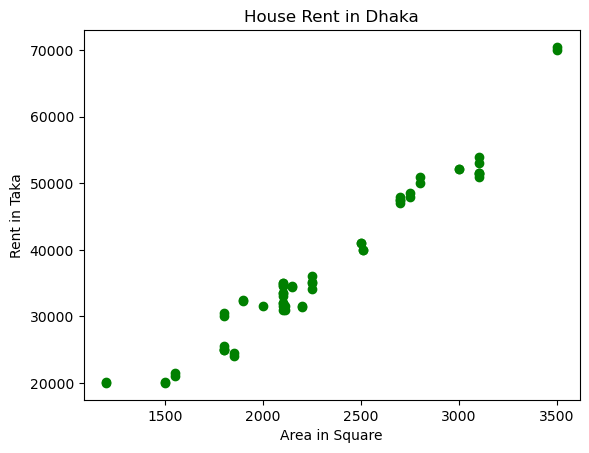

In [19]:
plt.scatter(x, y, color="green")
plt.xlabel("Area in Square")
plt.ylabel("Rent in Taka")
plt.title("House Rent in Dhaka")

In [21]:
# correlations
df.corr()

,area,rent
area,1.000000,0.974807
rent,0.974807,1.000000


In [26]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [29]:
reg.fit(df[['area']], y) # x value will always be 2D

LinearRegression()

In [31]:
reg.coef_

array([21.29266147])

In [33]:
#old c, m
print(c, m)

-11469.7354464311 21.292661473611954


In [34]:
#new c, m
print(reg.intercept_, reg.coef_)

-11469.735446431136 [21.29266147]


In [35]:
# prediction using sklearn
reg.predict([[2000]])

array([31115.58750079])

In [36]:
# new column for predicted values
df['predicted'] = reg.predict(df[['area']])
df.head()

,area,rent,predicted
0,2000,31500,31115.587501
1,2100,35000,33244.853648
2,2500,41050,41761.918238
3,2250,36100,36438.752869
4,3000,52100,52408.248974


In [37]:
# column for residuals
df['residuals'] = df['rent'] - df['predicted']
df.head()

,area,rent,predicted,residuals
0,2000,31500,31115.587501,384.412499
1,2100,35000,33244.853648,1755.146352
2,2500,41050,41761.918238,-711.918238
3,2250,36100,36438.752869,-338.752869
4,3000,52100,52408.248974,-308.248974


In [45]:
# calculate MAE, MSE, RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(df.predicted, df.rent)
mse

6778077.2040955555

In [46]:
mae = mean_absolute_error(df['predicted'], df['rent'])
mae

2009.869509357628

In [47]:
rmse = np.sqrt(mse)
rmse

2603.4740644176877

Text(0.5, 1.0, 'House Rent in Dhaka')

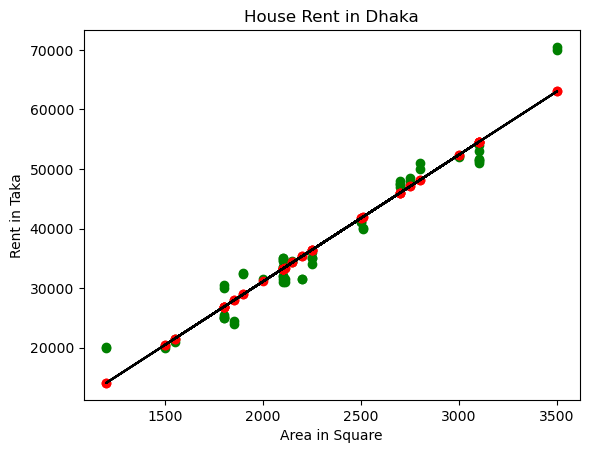

In [53]:
# plot best fit line
plt.scatter(x, y, color="green")

# predicted
plt.plot(x, df.predicted, color="black") # best fit line
plt.scatter(x, df.predicted, color="red")

#green = original
#red = predicted


plt.xlabel("Area in Square")
plt.ylabel("Rent in Taka")
plt.title("House Rent in Dhaka")